In [1]:
import sys, re, os
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import pandas as pd
import os
folder_path='../linear/intervention'
load_stimulus_global = pd.DataFrame()
file_names = []

for i in range(1, 59):
    item = 'exp-{}.csv'.format(i)
    file_names.append(item)

data_frames = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    data_frames.append(df)

combined_df = pd.concat(data_frames)
combined_df.to_csv("combined_intervention.csv", index=False)

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

In [5]:
from IPython.display import IFrame
IFrame("../assets/testbed.pdf", width=600, height=420)

In [6]:
# Metadata for specific SFC configurations

exp_ls='combined_intervention'
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

In [7]:
current_dir = os.getcwd()
file_path = os.path.abspath('..\linear\intervention\combined_intervention.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data = data.drop('latency', axis=1)
data.info()
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90791 entries, 0 to 1001
Data columns (total 62 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   firewall_instructions               90706 non-null  float64
 1   nf_router_instructions              90700 non-null  float64
 2   ndpi_stats_instructions             90697 non-null  float64
 3   payload_scan_instructions           90693 non-null  float64
 4   bridge_instructions                 90684 non-null  float64
 5   firewall_branches                   90747 non-null  float64
 6   nf_router_branches                  90746 non-null  float64
 7   ndpi_stats_branches                 90750 non-null  float64
 8   payload_scan_branches               90756 non-null  float64
 9   bridge_branches                     90751 non-null  float64
 10  firewall_branch-misses              90778 non-null  float64
 11  nf_router_branch-misses             90768 

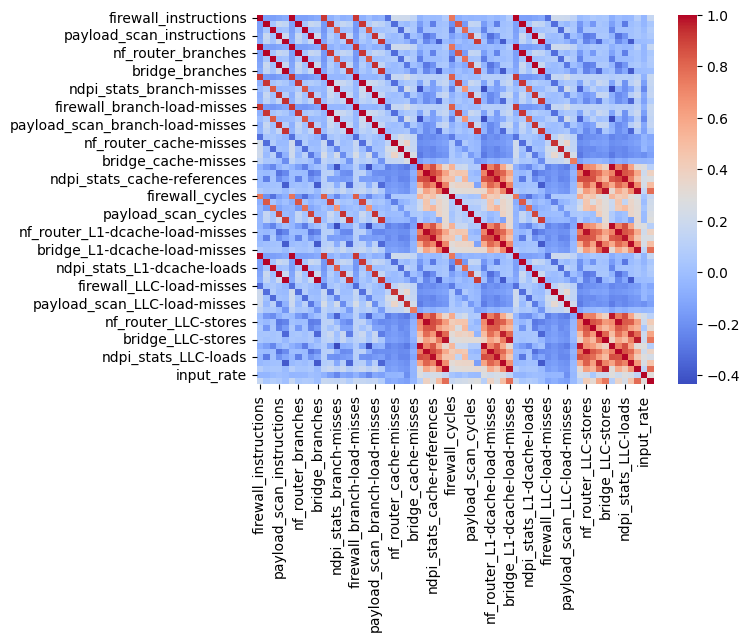

In [8]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

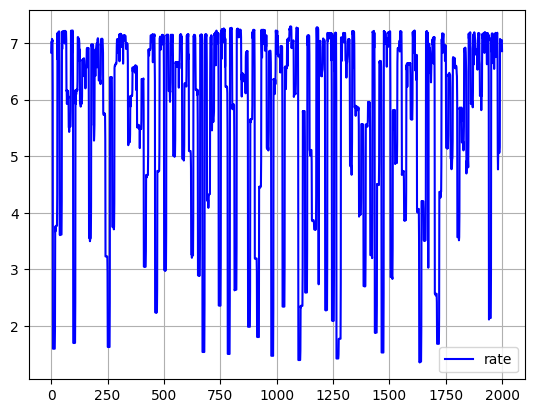

5.009901014306538
0.017927750889602
9.9989283085817


In [9]:
# input rate distribution
a = list(df['input_rate']/1000)
plt.plot(a[0:2000], c='b', label='rate')
plt.legend()
plt.grid()
plt.show()
print(sum(a)/len(a))
print(min(a))
print(max(a))

5337073
(87493, 2)


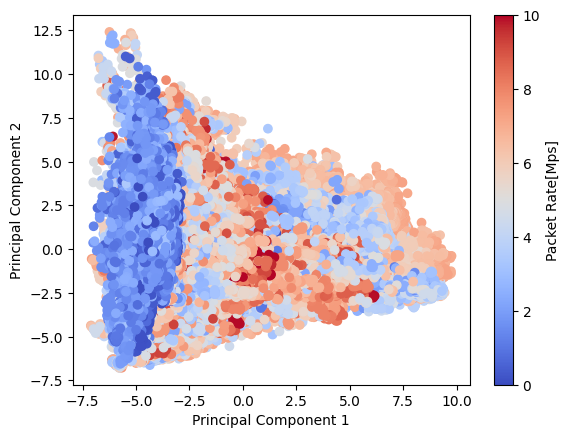

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data into a Pandas dataframe

df = data
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the target column from the other columns
target_col = 'input_rate'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col].div(1000)



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components =2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=10)
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))
# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'pca_random_rate.png')
plt.savefig(file_path)
plt.show()


# Print the eigenvectors and eigenvalues with one decimal place
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
c=np.dot(pca.components_[0],pca.components_[1])
#print("Eigenvectors:\n", np.round(pca.components_, 1))
#print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))
#print(c)


dependent_variable:9.9989283085817
5337073
(87493, 5)
PCA explained variance ratio: [0.26876213 0.13428597]


Text(0, 0.5, 'Principal Component 2')

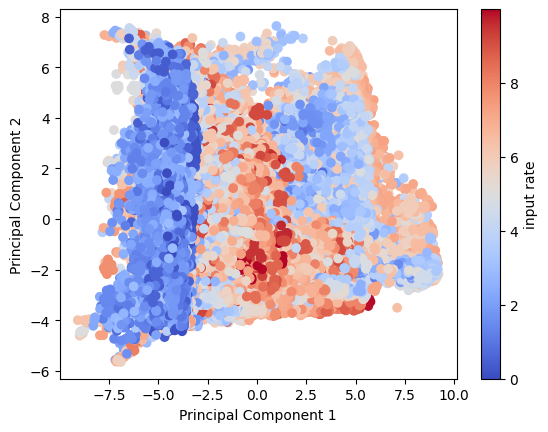

In [15]:
#spca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler


# Load CSV data into a Pandas dataframe
df = data
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the target column from the other columns
target_col = 'input_rate'
#target_col = 'latency'
independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col].div(1000)


print(f'dependent_variable:{max(dependent_variable)}')



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA

# Create a Sparse PCA object with 2 components
spca = SparsePCA(n_components=5, alpha =1)


# Fit the Sparse PCA model to the data
spca.fit(independent_variables_scaled)

# Transform the data into the reduced-dimension representation
X_spca = spca.transform(independent_variables_scaled)

independent_variables_pca = spca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=max(df[target_col].div(1000)))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))


# Get the explained variance ratio
cov_matrix = np.cov(independent_variables_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('input rate')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')



# rate prediction

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Read the CSV file
df = data
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
y = df['input_rate']



# the size seems now enough
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the regressor with optional hyperparameters (e.g., max_depth)
reg = DecisionTreeRegressor(random_state=0)
# Train the regressor on the training set
reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = reg.predict(X_test)


# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]

# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
   # distances_parital = [abs(real - pred) / real for real, pred in zip(y_test, y1_pred)]
   # accuracy_within_threshold_partial = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
   # accuracy_partical_cdf.append(accuracy_within_threshold_partial)
print(accuracy_cdf)




Accuracy within 5% threshold: 47.95793965254496
[0.0, 61.18561414202986, 74.07802499238038, 81.7624199939043, 86.71517829929898, 90.11734227369705, 92.65086863761049, 94.39957330082291, 95.46632124352331, 96.27019201462969, 96.90643096616886]


C:\Users\Qiong\AppData\Local\Temp\ipykernel_18028\1439524975.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


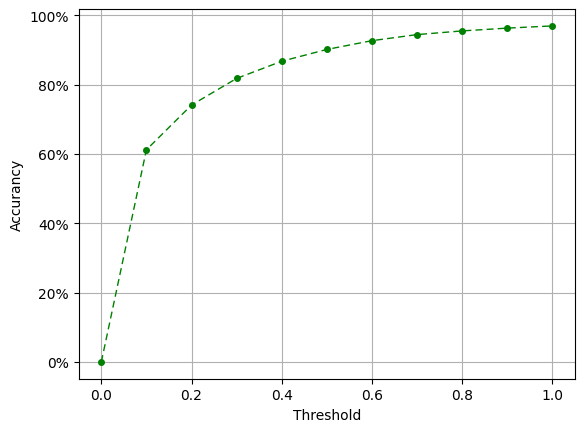

In [19]:
#plt.plot(accuracy_cdf)  
plt.plot([num/10 for num in range(11)],accuracy_cdf, marker='o',markersize = 4, c='g',linestyle='-',linewidth=1, dashes=(5, 3),)  
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.xlabel('Threshold')
plt.ylabel('Accurancy')
plt.grid()


In [20]:
# several ML to predict rate

In [23]:
# Read the CSV file
df =data
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()
# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
y = df['input_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
column_order = X_train.columns
X_test = X_test[column_order]

# Create a linear regression model
model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = SVR(kernel='linear')
# Train the model
reg = model.fit(X_train, y_train)

Accuracy within 5% threshold: 16.942243218530937
[0.0, 6.842426089606827, 13.581987199024686, 19.8796098750381, 25.70862541907955, 31.568119475769585, 37.115208777811645, 42.037488570557755, 46.395915879305086, 50.33145382505334, 53.96601645839682]


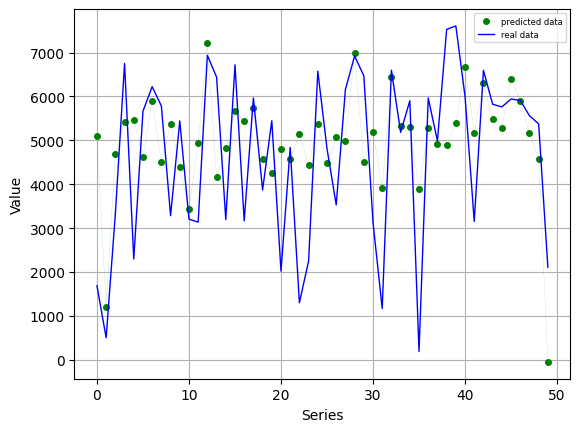

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.plot(y_pred[0:50], marker='o',markersize = 4, c='g',linestyle='-',linewidth=0.1, dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',c='b',linewidth = 1,label='real data')


plt.legend(loc="upper right", fontsize=6)
plt.xlabel('Series')
plt.ylabel('Value')
plt.grid()


# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/50
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# DNN

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [12]:
# Read the CSV file
df = data
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
y = df['input_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
column_order = X_train.columns
X_test = X_test[column_order]

print(len(y))

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

87493


In [13]:
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1)


Epoch 1/100
4375/4375 [==============================] - 8s 2ms/step - loss: 7053124.5000
Epoch 2/100
4375/4375 [==============================] - 18s 4ms/step - loss: 3008458.5000
Epoch 3/100
4375/4375 [==============================] - 12s 3ms/step - loss: 2630939.2500
Epoch 4/100
4375/4375 [==============================] - 8s 2ms/step - loss: 2331804.2500
Epoch 5/100
4375/4375 [==============================] - 11s 2ms/step - loss: 2037400.7500
Epoch 6/100
4375/4375 [==============================] - 17s 4ms/step - loss: 1840067.5000
Epoch 7/100
4375/4375 [==============================] - 10s 2ms/step - loss: 1719365.0000
Epoch 8/100
4375/4375 [==============================] - 10s 2ms/step - loss: 1626462.0000
Epoch 9/100
4375/4375 [==============================] - 19s 4ms/step - loss: 1554868.5000
Epoch 10/100
4375/4375 [==============================] - 13s 3ms/step - loss: 1496017.2500
Epoch 11/100
4375/4375 [==============================] - 12s 3ms/step - loss: 1448591.0000

Epoch 91/100
4375/4375 [==============================] - 9s 2ms/step - loss: 984824.3750
Epoch 92/100
4375/4375 [==============================] - 9s 2ms/step - loss: 984483.1875
Epoch 93/100
4375/4375 [==============================] - 9s 2ms/step - loss: 983999.0000
Epoch 94/100
4375/4375 [==============================] - 11s 2ms/step - loss: 982656.9375
Epoch 95/100
4375/4375 [==============================] - 10s 2ms/step - loss: 981436.1250
Epoch 96/100
4375/4375 [==============================] - 8s 2ms/step - loss: 981038.5625
Epoch 97/100
4375/4375 [==============================] - 8s 2ms/step - loss: 980325.7500
Epoch 98/100
4375/4375 [==============================] - 7s 2ms/step - loss: 980136.4375
Epoch 99/100
4375/4375 [==============================] - 8s 2ms/step - loss: 980153.7500
Epoch 100/100
4375/4375 [==============================] - 7s 2ms/step - loss: 979544.9375


547/547 [==============================] - 1s 2ms/step
[0.0, 16.658094748271328, 29.97885593462484, 40.076575804331675, 48.47705583176182, 54.87742156694668, 60.00914337962169, 64.28938796502656, 68.06674667123835, 71.1697811303503, 73.71849819989714]


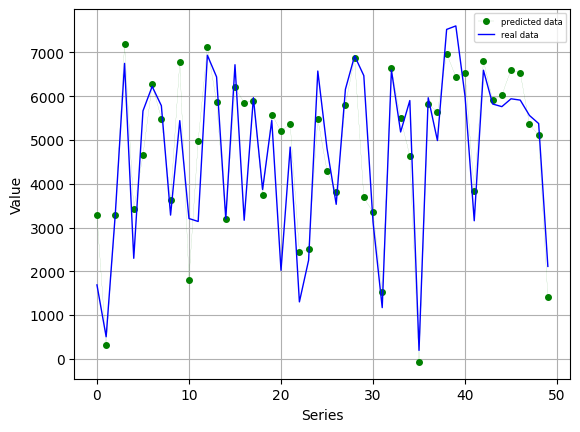

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

plt.plot(y_pred[0:50], marker='o',markersize = 4, c='g',linestyle='-',linewidth=0.1, dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',c='b',linewidth = 1,label='real data')


plt.legend(loc="upper right", fontsize=6)
plt.xlabel('Series')
plt.ylabel('Value')
plt.grid()


# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100



# Print the accuracy within the threshold
#print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/50
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)


In [ ]:
[0.0, 19.521115492313847, 33.927653008743356, 44.002514429395966, 51.62580718898223, 57.791873821361214, 62.67215269443969, 66.52380136007771, 69.91256643236756, 72.68415338019315, 75.19858277615864]